In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from embryo_segmenting import *
from resnet_unet import *

In [3]:
import torch.optim as optim
from torch.optim import lr_scheduler

In [4]:
data_dir = '../dataset'
image_datasets = {x: Dataset(os.path.join(data_dir, x), image_size=224, mask_size=224, is_deeplab=False)
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, 
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 2

model = ResNetUNet(num_class).to(device)

# freeze backbone layers
# Comment out to finetune further
for l in model.base_layers:
    for param in l.parameters():
        param.requires_grad = False

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)        

cuda:0


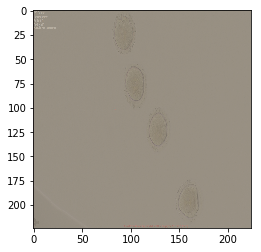

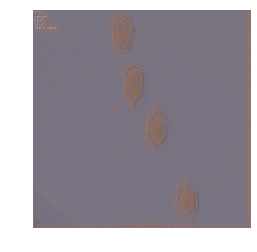

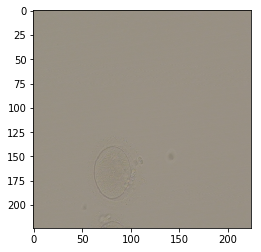

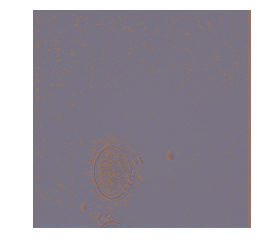

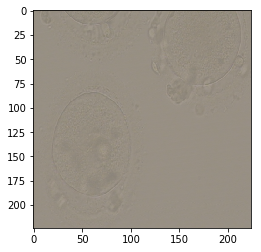

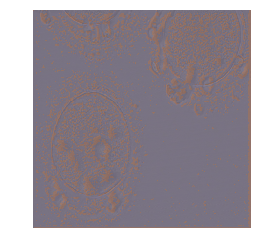

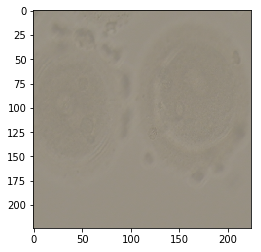

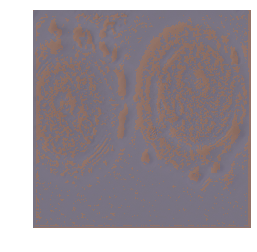

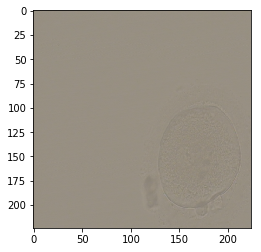

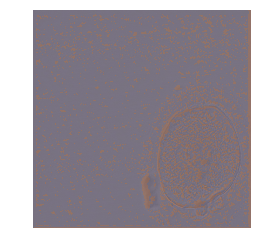

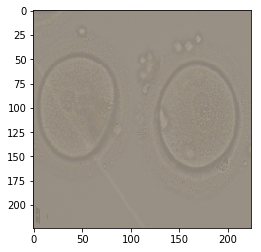

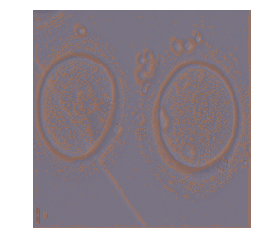

In [6]:
visualize_segmenter(model, dataloaders['val'], device)

In [32]:
model = train_model(model, optimizer_ft, exp_lr_scheduler, dataloaders, device, num_epochs=1)

Epoch 0/0
----------
LR 1e-05
train: iou: 0.932145, aed: 10.169231, bce: 0.031824, dice: 0.026862, loss: 0.029343
val: iou: 0.895360, aed: 10.188841, bce: 0.065839, dice: 0.039874, loss: 0.052857
saving best model
0m 50s
Best val loss: 0.052857


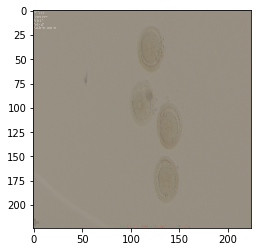

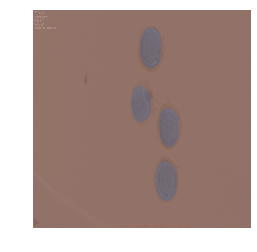

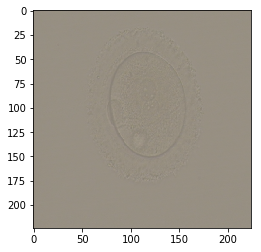

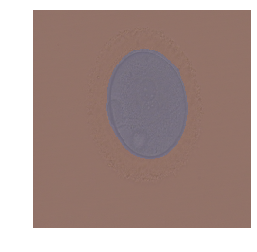

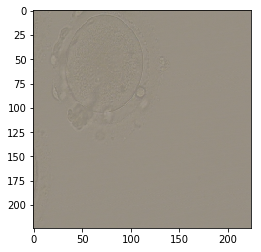

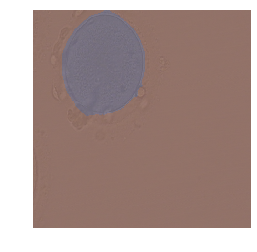

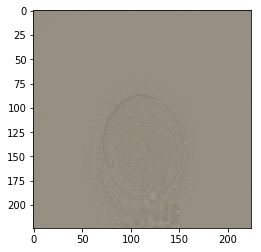

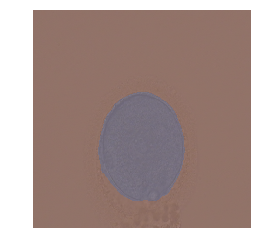

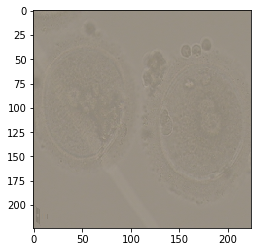

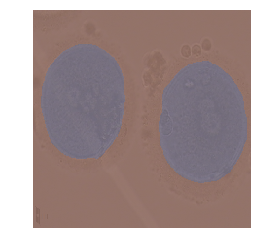

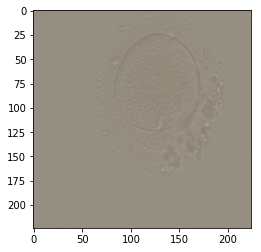

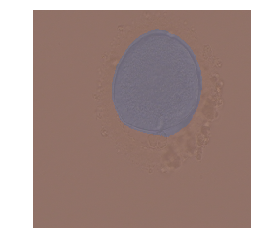

In [12]:
visualize_segmenter(model, dataloaders['val'], device)

In [47]:
results = score_segmenter(model, dataloaders, device)
print(results)

(0.8953595478292478, 0.1630901287553648)


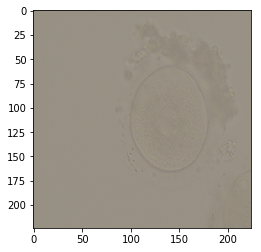

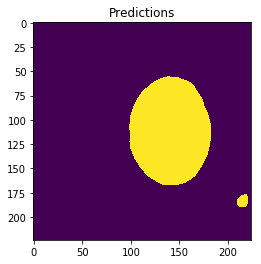

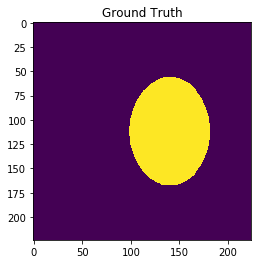

Really have 1 but predicted 2


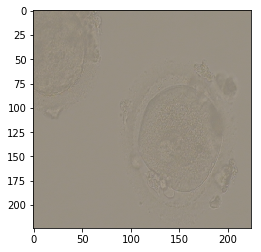

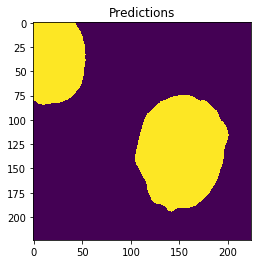

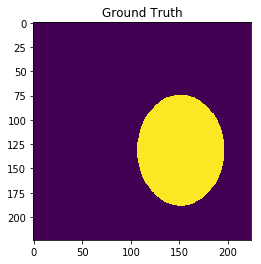

Really have 1 but predicted 2


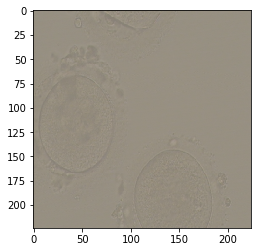

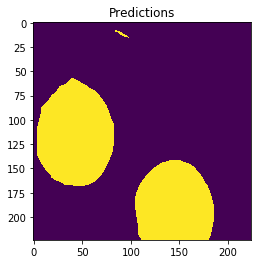

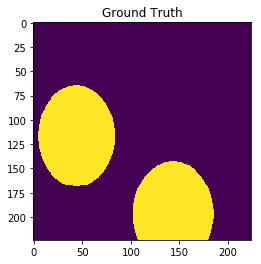

Really have 2 but predicted 3


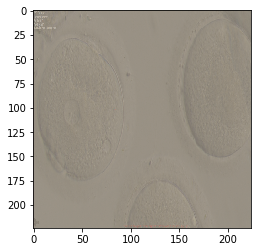

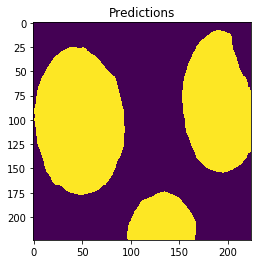

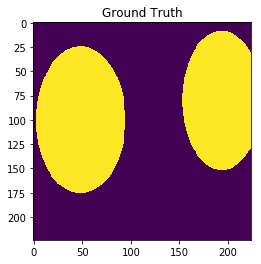

Really have 2 but predicted 3


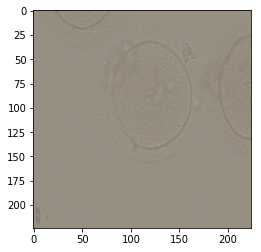

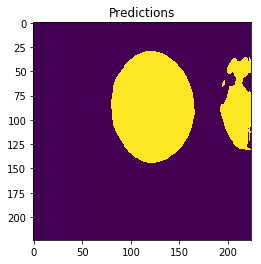

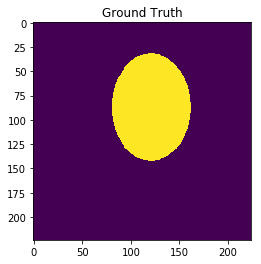

Really have 1 but predicted 3


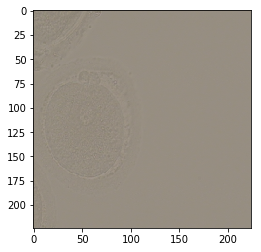

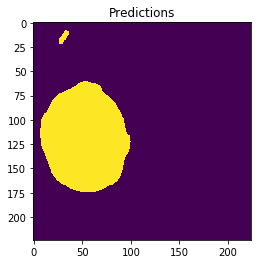

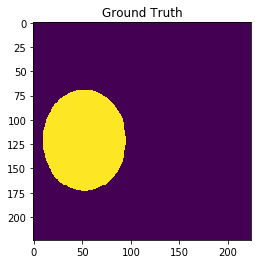

Really have 1 but predicted 2


In [45]:
visualize_counting_errors(model, dataloaders['val'], device)

In [28]:
from plotting import *

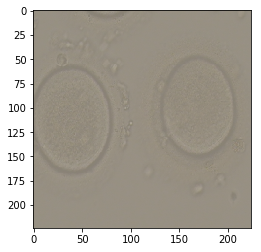

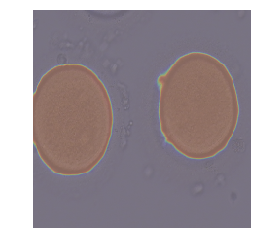

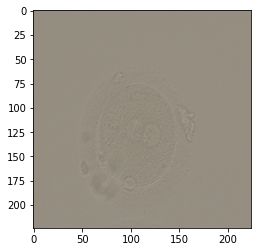

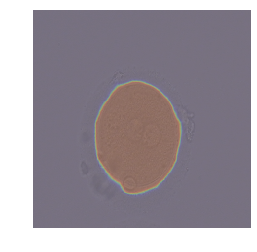

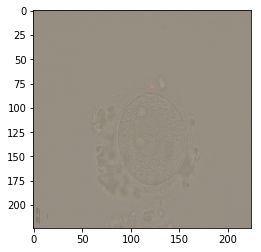

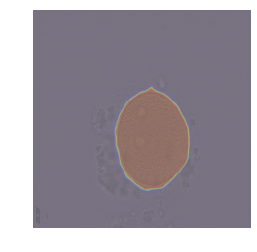

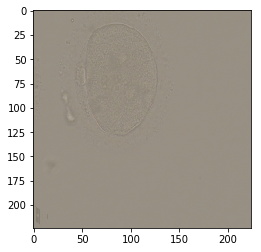

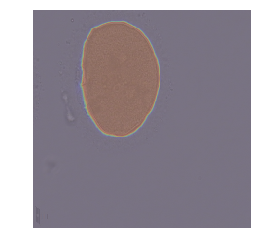

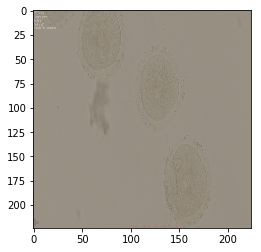

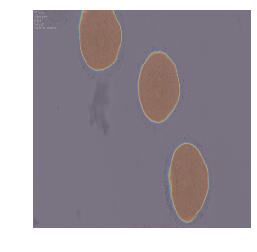

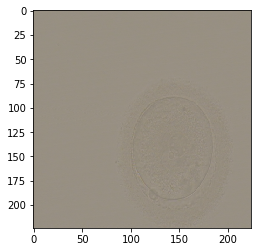

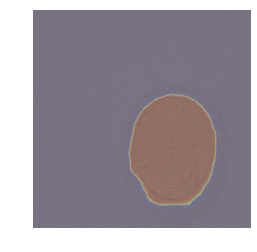

In [48]:
visualize_embryo_masks(model, dataloaders['val'], device)